Let's try combining the KNN and neural net! [See scripts imported for generation of those models]

In [1]:
from neural_net import ann_model, mse, test_dataset, test_labels, train_dataset, train_labels
from KNN import knn_model, pipe95
import pandas as pd

Epoch 1/150
1179/1179 - 2s - loss: 87976192.0000 - val_loss: 58147300.0000 - 2s/epoch - 2ms/step
Epoch 2/150
1179/1179 - 2s - loss: 54713648.0000 - val_loss: 51757676.0000 - 2s/epoch - 1ms/step
Epoch 3/150
1179/1179 - 2s - loss: 52264576.0000 - val_loss: 50963208.0000 - 2s/epoch - 1ms/step
Epoch 4/150
1179/1179 - 2s - loss: 50730536.0000 - val_loss: 48525196.0000 - 2s/epoch - 2ms/step
Epoch 5/150
1179/1179 - 2s - loss: 48738744.0000 - val_loss: 50095156.0000 - 2s/epoch - 2ms/step
Epoch 6/150
1179/1179 - 3s - loss: 47810512.0000 - val_loss: 44599672.0000 - 3s/epoch - 3ms/step
Epoch 7/150
1179/1179 - 5s - loss: 45707868.0000 - val_loss: 51032840.0000 - 5s/epoch - 4ms/step
Epoch 8/150
1179/1179 - 4s - loss: 44650928.0000 - val_loss: 47185228.0000 - 4s/epoch - 4ms/step
Epoch 9/150
1179/1179 - 5s - loss: 43929456.0000 - val_loss: 44123616.0000 - 5s/epoch - 4ms/step
Epoch 10/150
1179/1179 - 5s - loss: 43361984.0000 - val_loss: 43359824.0000 - 5s/epoch - 4ms/step
Epoch 11/150
1179/1179 - 4s -

Let's define a model class that's extensible for ensembling other models. [All my own code]

In [2]:
class Model:
    def __init__(self, knn_weight, ann_weight, bayes_weight, logreg_weight) -> None:
        self.knn_weight = knn_weight
        self.ann_weight = ann_weight
        # self.bayes_weight = bayes_weight
        # self.logreg_weight = logreg_weight
        assert(abs(1 - (knn_weight + ann_weight + bayes_weight + logreg_weight)) < 1e-3)
        self.knn = knn_model
        self.ann = ann_model
        #self.bayes = bayes_model
        #self.logreg = logreg_model
    
    def predict(self, x):
        return self.knn.predict(pipe95.transform(x))*self.knn_weight + self.ann.predict(x)*self.ann_weight # + self.bayes_model.predict(x)*self.bayes_weight + self.logreg.predict(x)*self.logreg_weight

Now, let's see how to weight the KNN in conjunction with the neural net.

In [3]:
import matplotlib.pyplot as plt
neural_net_weights = []
mses = []

for weight in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    _model = Model(ann_weight=weight, knn_weight=1.0-weight, bayes_weight=0.0, logreg_weight=0.0)   
    y_prime = _model.predict(test_dataset.drop(columns=['IncomePerCap']))
    y = test_labels.to_numpy()
    # print(y_prime, y, y_prime.shape, y.shape)
    neural_net_weights.append(100*weight)
    mses.append(mse(y, y_prime))

mses

228/228 [==============================] - 1s 3ms/step


[274648761.8839384,
 230611196.3233572,
 191192253.04992944,
 156391929.18792108,
 126210233.36453895,
 100647160.36900961,
 79702699.33894704,
 63376876.83562347,
 51669661.43961608,
 44581078.5941247,
 42111110.37458343]

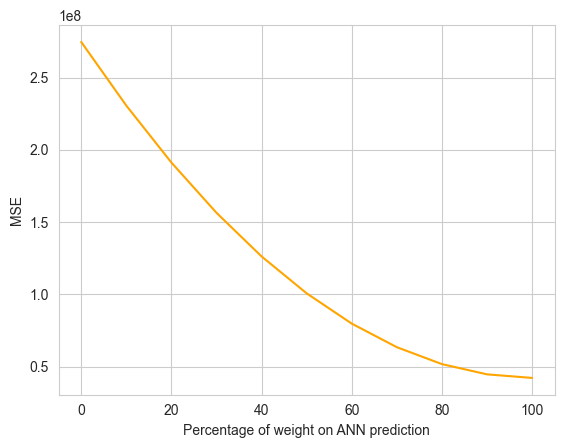

In [4]:
import seaborn as sns
sns.set_style('whitegrid')
plt.plot(neural_net_weights, mses, color='orange')
plt.xlabel('Percentage of weight on ANN prediction')
plt.ylabel('MSE')
plt.show()

As you can see, the neural net is so much better than KNN that there's no benefit combining them.